In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [5]:
df_wine=pd.read_csv("winequality-red.csv")
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
#checking data distribution

df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# checking data about columns
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


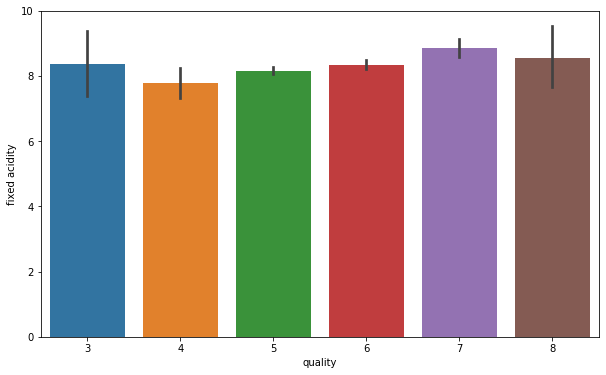

In [8]:
f=plt.figure(figsize=(10,6))
sns.barplot(x='quality',y='fixed acidity',data=df_wine)

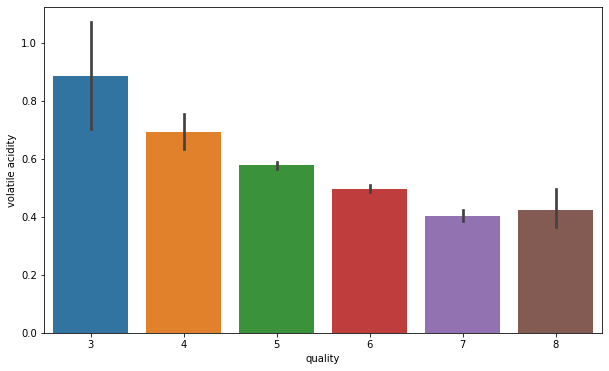

In [9]:
f= plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df_wine)

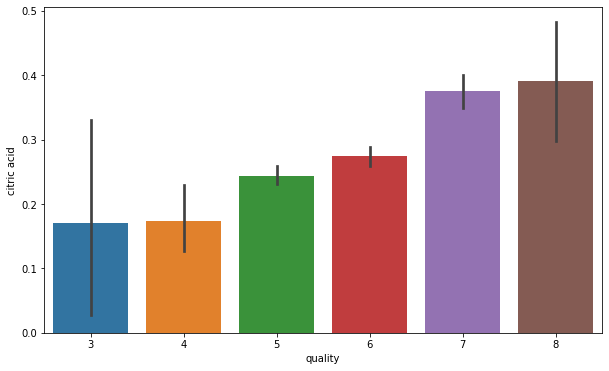

In [10]:
f = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df_wine)

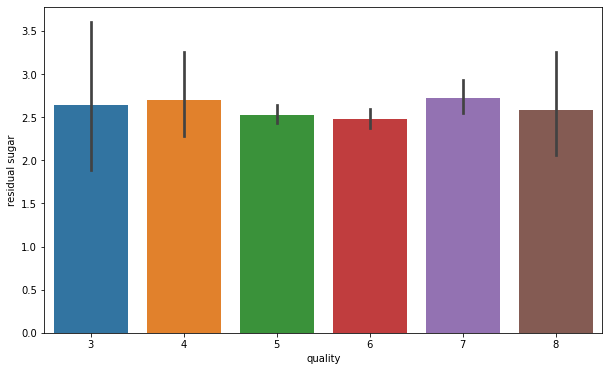

In [11]:
f= plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df_wine)

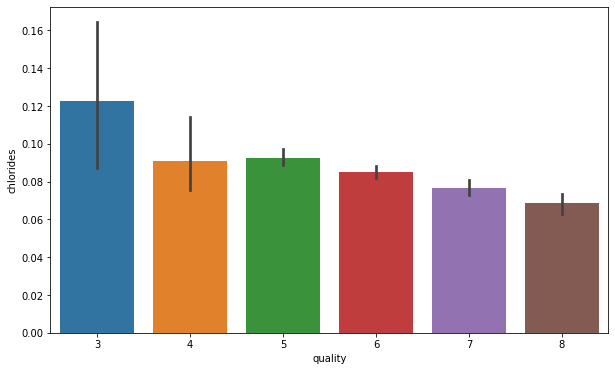

In [13]:
f = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df_wine)

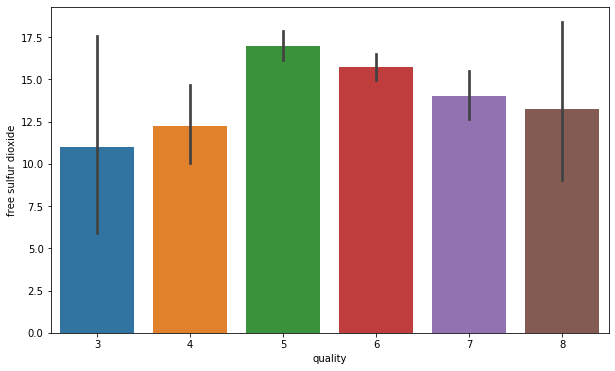

In [14]:
f = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df_wine)

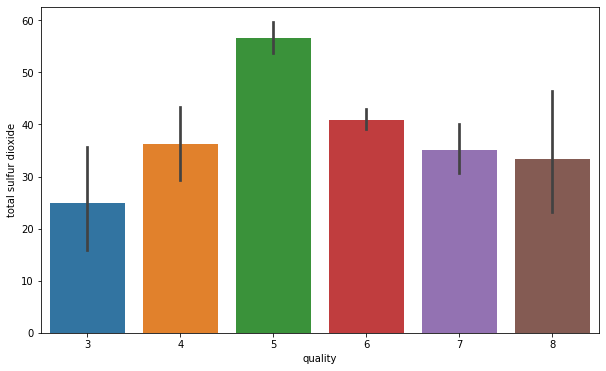

In [15]:
f = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df_wine)

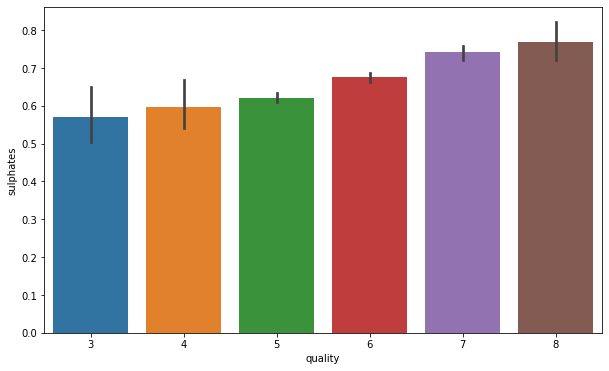

In [16]:
f = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df_wine)

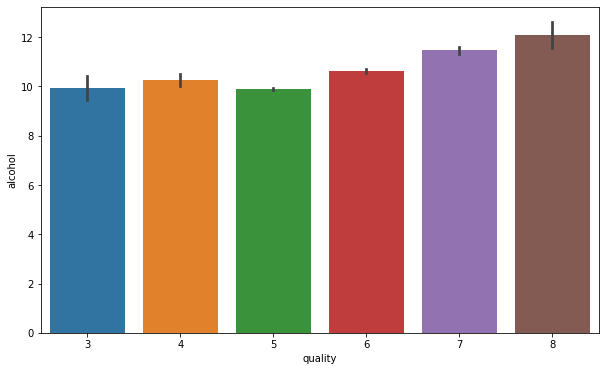

In [17]:
f = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df_wine)

In [20]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df_wine['quality'] = pd.cut(df_wine['quality'], bins = bins, labels = group_names)

In [21]:
label_quality = LabelEncoder()

In [22]:
df_wine['quality'] = label_quality.fit_transform(df_wine['quality'])


In [23]:
df_wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

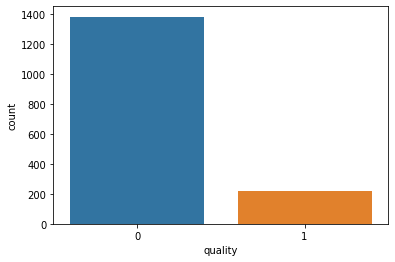

In [24]:
sns.countplot(df_wine['quality'])

In [26]:
#Now seperate the dataset as response variable and feature variabes
x = df_wine.drop('quality', axis = 1)
y = df_wine['quality']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [28]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [29]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [31]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [32]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.72      0.38      0.50        47

    accuracy                           0.89       320
   macro avg       0.81      0.68      0.72       320
weighted avg       0.88      0.89      0.87       320



In [33]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[266   7]
 [ 29  18]]


In [35]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

In [36]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       273
           1       0.50      0.43      0.46        47

    accuracy                           0.85       320
   macro avg       0.70      0.68      0.69       320
weighted avg       0.84      0.85      0.85       320



In [37]:
print(confusion_matrix(y_test, pred_sgd))

[[253  20]
 [ 27  20]]


In [38]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [39]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [40]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [41]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [42]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [43]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [45]:
rfc_eval = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9101131889763779